# TESTING GYM TRADING

## Install dependencies

In [8]:
!pip install tensorflow stable-baselines3 gym-anytrading gym gymnasium gym-trading-env

## import all necessary libs

In [9]:
# rl stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C, DQN, PPO

# gym stuff
import gym_trading_env
import gymnasium as gym
from gym_trading_env.renderer import Renderer
from gym_trading_env.downloader import download

# processing stuff
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import datetime

## download crypto data from gym_trading

In [3]:
download(
    exchange_names = ["binance", "bitfinex2", "huobi"],
    symbols= ["BTC/USDT", "ETH/USDT"],
    timeframe= "1h",
    dir = "data",
    since= datetime.datetime(year= 2019, month= 1, day=1),
    until = datetime.datetime(year= 2023, month= 1, day=1),
)

BTC/USDT downloaded from binance and stored at data/binance-BTCUSDT-1h.pkl
BTC/USDT downloaded from huobi and stored at data/huobi-BTCUSDT-1h.pkl
ETH/USDT downloaded from binance and stored at data/binance-ETHUSDT-1h.pkl
BTC/USDT downloaded from bitfinex2 and stored at data/bitfinex2-BTCUSDT-1h.pkl
ETH/USDT downloaded from huobi and stored at data/huobi-ETHUSDT-1h.pkl
ETH/USDT downloaded from bitfinex2 and stored at data/bitfinex2-ETHUSDT-1h.pkl


## set dataframe

In [10]:
df = pd.read_pickle("./data/binance-BTCUSDT-1h.pkl")
df

,open,high,low,close,volume,date_close
date_open,,,,,,
2019-01-01 04:00:00,3692.32,3720.00,3685.94,3692.71,1317.452909,2019-01-01 05:00:00
2019-01-01 05:00:00,3693.98,3704.44,3692.73,3699.94,572.402228,2019-01-01 06:00:00
2019-01-01 06:00:00,3699.95,3713.93,3697.00,3703.56,660.279771,2019-01-01 07:00:00
2019-01-01 07:00:00,3703.63,3726.64,3703.34,3713.83,823.625491,2019-01-01 08:00:00
2019-01-01 08:00:00,3714.19,3731.19,3707.00,3716.70,887.101362,2019-01-01 09:00:00
...,...,...,...,...,...,...
2022-12-31 22:00:00,16548.28,16567.49,16470.00,16520.81,6695.136250,2022-12-31 23:00:00
2022-12-31 23:00:00,16520.28,16551.24,16487.74,16542.40,4973.433070,2023-01-01 00:00:00
2023-01-01 00:00:00,16541.77,16545.70,16508.39,16529.67,4364.835700,2023-01-01 01:00:00


## set the environment

In [11]:
env = gym.make("TradingEnv",
               name= "BTCUSD",
               df = df.iloc[:, :],
               positions = [ -1, 0, 1],
               trading_fees = 0.01/100,
               borrow_interest_rate= 0.0003/100,
               windows=5)

## portifolio valuation with random choices

Market Return : 345.24%   |   Portfolio Return : -96.71%   |   


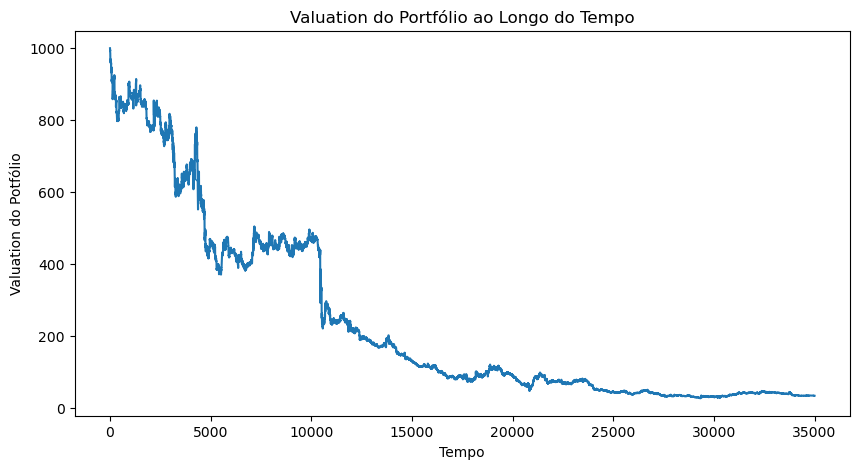

In [12]:
done, truncated = False, False;
observation, info = env.reset();

portfolio_values = []
while not done and not truncated:
    action = env.action_space.sample()
    observation, reward, done, truncated, info = env.step(action)
    portfolio_values.append(info['portfolio_valuation'])
    
    if done or truncated:
        break
        
## data visualization
plt.figure(figsize=(10, 5))
plt.plot(portfolio_values)
plt.title('Valuation do Portfólio ao Longo do Tempo')
plt.xlabel('Tempo')
plt.ylabel('Valuation do Potfólio')
plt.show()

env.env.unwrapped.save_for_render(dir = "render_logs")

In [ ]:
from gym_trading_env.renderer import Renderer
renderer = Renderer(render_logs_dir="render_logs")
renderer.run()

 * Serving Flask app 'gym_trading_env.renderer'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [20/Dec/2023 12:48:16] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [20/Dec/2023 12:48:18] "GET /update_data/BTCUSD_2023-12-06_17-28-52.pkl HTTP/1.1" 200 -
127.0.0.1 - - [20/Dec/2023 12:48:19] "GET /metrics HTTP/1.1" 200 -


## portfolio valuation with A2C trainning and MlpPolicy policy

In [48]:
## trainning

env_maker = lambda: gym.make('TradingEnv', df=df, windows=5)
env = DummyVecEnv([env_maker])

model = A2C('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=100000)

Using cpu device
------------------------------------
| time/                 |          |
|    fps                | 520      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.689   |
|    explained_variance | -421     |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -0.012   |
|    value_loss         | 0.00116  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 581      |
|    iterations         | 200      |
|    time_elapsed       | 1        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.685   |
|    explained_variance | -82.6    |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | -0.00897 |
|    value_loss      

-------------------------------------
| time/                 |           |
|    fps                | 462       |
|    iterations         | 1700      |
|    time_elapsed       | 18        |
|    total_timesteps    | 8500      |
| train/                |           |
|    entropy_loss       | -0.113    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 1699      |
|    policy_loss        | -1.72e-05 |
|    value_loss         | 5.33e-06  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 445       |
|    iterations         | 1800      |
|    time_elapsed       | 20        |
|    total_timesteps    | 9000      |
| train/                |           |
|    entropy_loss       | -0.0712   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 1799      |
|    policy_loss        | -2.01e-05 |
|    value_l

------------------------------------
| time/                 |          |
|    fps                | 454      |
|    iterations         | 3300     |
|    time_elapsed       | 36       |
|    total_timesteps    | 16500    |
| train/                |          |
|    entropy_loss       | -0.0124  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3299     |
|    policy_loss        | 9.24e-06 |
|    value_loss         | 5.56e-05 |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 455       |
|    iterations         | 3400      |
|    time_elapsed       | 37        |
|    total_timesteps    | 17000     |
| train/                |           |
|    entropy_loss       | -0.0141   |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3399      |
|    policy_loss        | -3.12e-06 |
|    value_loss         | 

-------------------------------------
| time/                 |           |
|    fps                | 460       |
|    iterations         | 4900      |
|    time_elapsed       | 53        |
|    total_timesteps    | 24500     |
| train/                |           |
|    entropy_loss       | -0.388    |
|    explained_variance | -2.48     |
|    learning_rate      | 0.0007    |
|    n_updates          | 4899      |
|    policy_loss        | -0.000394 |
|    value_loss         | 6.16e-06  |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 460      |
|    iterations         | 5000     |
|    time_elapsed       | 54       |
|    total_timesteps    | 25000    |
| train/                |          |
|    entropy_loss       | -0.222   |
|    explained_variance | -19.7    |
|    learning_rate      | 0.0007   |
|    n_updates          | 4999     |
|    policy_loss        | 0.0248   |
|    value_loss         

-------------------------------------
| time/                 |           |
|    fps                | 472       |
|    iterations         | 6500      |
|    time_elapsed       | 68        |
|    total_timesteps    | 32500     |
| train/                |           |
|    entropy_loss       | -0.126    |
|    explained_variance | -3.17     |
|    learning_rate      | 0.0007    |
|    n_updates          | 6499      |
|    policy_loss        | -1.18e-05 |
|    value_loss         | 2.2e-07   |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 473      |
|    iterations         | 6600     |
|    time_elapsed       | 69       |
|    total_timesteps    | 33000    |
| train/                |          |
|    entropy_loss       | -0.113   |
|    explained_variance | 0.714    |
|    learning_rate      | 0.0007   |
|    n_updates          | 6599     |
|    policy_loss        | 3.51e-07 |
|    value_loss         

-------------------------------------
| time/                 |           |
|    fps                | 479       |
|    iterations         | 8100      |
|    time_elapsed       | 84        |
|    total_timesteps    | 40500     |
| train/                |           |
|    entropy_loss       | -0.258    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 8099      |
|    policy_loss        | -2.77e-07 |
|    value_loss         | 1.67e-11  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 479       |
|    iterations         | 8200      |
|    time_elapsed       | 85        |
|    total_timesteps    | 41000     |
| train/                |           |
|    entropy_loss       | -0.37     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 8199      |
|    policy_loss        | -0.000163 |
|    value_l

------------------------------------
| time/                 |          |
|    fps                | 484      |
|    iterations         | 9700     |
|    time_elapsed       | 100      |
|    total_timesteps    | 48500    |
| train/                |          |
|    entropy_loss       | -0.278   |
|    explained_variance | -380     |
|    learning_rate      | 0.0007   |
|    n_updates          | 9699     |
|    policy_loss        | 0.00251  |
|    value_loss         | 1.86e-05 |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 485       |
|    iterations         | 9800      |
|    time_elapsed       | 100       |
|    total_timesteps    | 49000     |
| train/                |           |
|    entropy_loss       | -0.415    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 9799      |
|    policy_loss        | -4.01e-05 |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 474      |
|    iterations         | 11300    |
|    time_elapsed       | 118      |
|    total_timesteps    | 56500    |
| train/                |          |
|    entropy_loss       | -0.128   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 11299    |
|    policy_loss        | 3.18e-06 |
|    value_loss         | 1.51e-08 |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 473       |
|    iterations         | 11400     |
|    time_elapsed       | 120       |
|    total_timesteps    | 57000     |
| train/                |           |
|    entropy_loss       | -0.122    |
|    explained_variance | -3.65e+03 |
|    learning_rate      | 0.0007    |
|    n_updates          | 11399     |
|    policy_loss        | -3.14e-06 |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 481      |
|    iterations         | 12900    |
|    time_elapsed       | 133      |
|    total_timesteps    | 64500    |
| train/                |          |
|    entropy_loss       | -0.0421  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 12899    |
|    policy_loss        | 3.46e-06 |
|    value_loss         | 2.88e-07 |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 482       |
|    iterations         | 13000     |
|    time_elapsed       | 134       |
|    total_timesteps    | 65000     |
| train/                |           |
|    entropy_loss       | -0.0226   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 12999     |
|    policy_loss        | -2.43e-09 |
|    value_loss         | 

-------------------------------------
| time/                 |           |
|    fps                | 492       |
|    iterations         | 14500     |
|    time_elapsed       | 147       |
|    total_timesteps    | 72500     |
| train/                |           |
|    entropy_loss       | -0.0101   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 14499     |
|    policy_loss        | -3.38e-11 |
|    value_loss         | 4.1e-16   |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 493       |
|    iterations         | 14600     |
|    time_elapsed       | 148       |
|    total_timesteps    | 73000     |
| train/                |           |
|    entropy_loss       | -0.0188   |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 14599     |
|    policy_loss        | 1.12e-07  |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 498       |
|    iterations         | 16100     |
|    time_elapsed       | 161       |
|    total_timesteps    | 80500     |
| train/                |           |
|    entropy_loss       | -0.00735  |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 16099     |
|    policy_loss        | -2.26e-11 |
|    value_loss         | 2.7e-16   |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 499      |
|    iterations         | 16200    |
|    time_elapsed       | 162      |
|    total_timesteps    | 81000    |
| train/                |          |
|    entropy_loss       | -0.0141  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 16199    |
|    policy_loss        | 1.86e-07 |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 506      |
|    iterations         | 17700    |
|    time_elapsed       | 174      |
|    total_timesteps    | 88500    |
| train/                |          |
|    entropy_loss       | -0.00302 |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 17699    |
|    policy_loss        | 1.09e-11 |
|    value_loss         | 2.3e-16  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 507      |
|    iterations         | 17800    |
|    time_elapsed       | 175      |
|    total_timesteps    | 89000    |
| train/                |          |
|    entropy_loss       | -0.00302 |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 17799    |
|    policy_loss        | 1.09e-11 |
|    value_loss         | 2.02e-16 |
-

-------------------------------------
| time/                 |           |
|    fps                | 514       |
|    iterations         | 19300     |
|    time_elapsed       | 187       |
|    total_timesteps    | 96500     |
| train/                |           |
|    entropy_loss       | -0.00622  |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 19299     |
|    policy_loss        | -2.47e-11 |
|    value_loss         | 3.57e-16  |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 515      |
|    iterations         | 19400    |
|    time_elapsed       | 188      |
|    total_timesteps    | 97000    |
| train/                |          |
|    entropy_loss       | -0.00622 |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 19399    |
|    policy_loss        | 1.33e-11 |
|    value_loss         

Market Return : 345.24%   |   Portfolio Return : -17.13%   |   


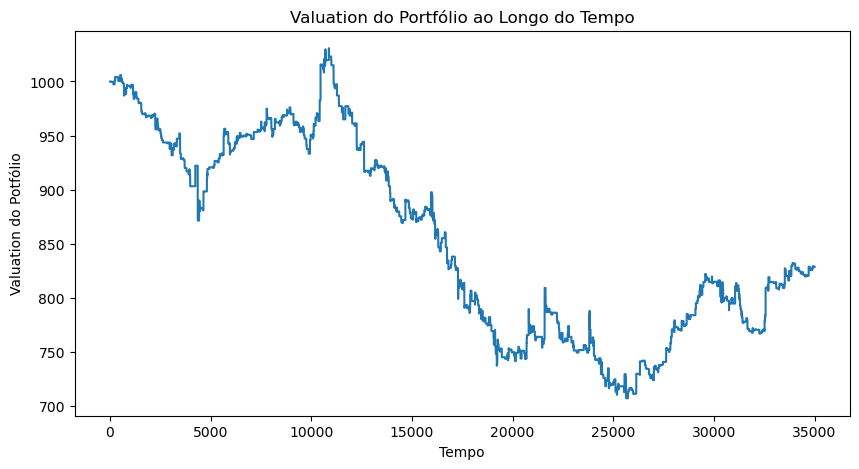

In [72]:
## taking actions

env = gym.make("TradingEnv",
              name='BTCUSD',
              df=df.iloc[:, :],
              positions=[-1, 0, 1],
              trading_fees=0.01/100,
              borrow_interest_rate=0.0003/100,
              windows=5)


done, truncated = False, False
observation, info = env.reset()

portfolio_values = []
while not done and not truncated:
    action, _states = model.predict(observation)
    observation, reward, done, truncated, info = env.step(action)
    portfolio_values.append(info['portfolio_valuation'])
    
    if done or truncated:
        break
        
# data visualization
plt.figure(figsize=(10, 5))
plt.plot(portfolio_values)
plt.title('Valuation do Portfólio ao Longo do Tempo')
plt.xlabel('Tempo')
plt.ylabel('Valuation do Potfólio')
plt.show()


## portfolio valuation with DQN trainning and MlpPolicy policy


In [67]:
## trainning DQN

env_maker = lambda: gym.make('TradingEnv', df=df, windows=5)
env = DummyVecEnv([env_maker])

model = DQN('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=100000)

Using cpu device
Market Return : 345.24%   |   Portfolio Return : -18.34%   |   
Market Return : 345.24%   |   Portfolio Return : 29.75%   |   


Market Return : 345.24%   |   Portfolio Return : -26.36%   |   


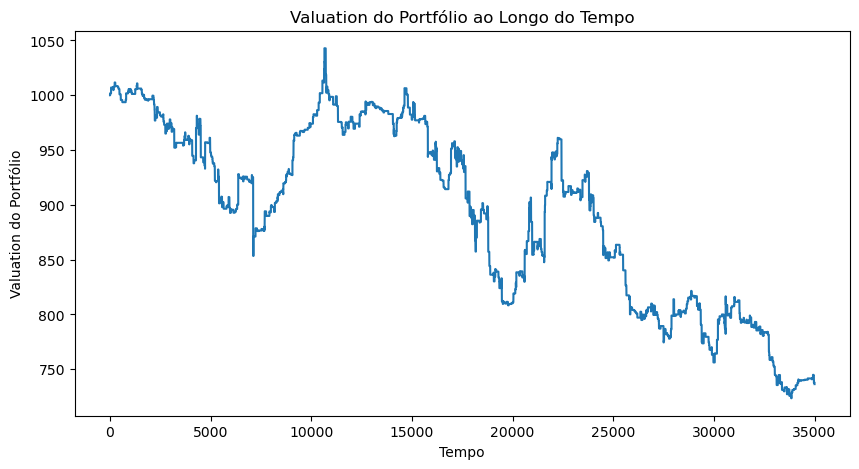

In [73]:
portfolio_values = []

env = gym.make("TradingEnv",
              name='BTCUSD',
              df=df.iloc[:, :],
              positions=[-1, 0, 1],
              trading_fees=0.01/100,
              borrow_interest_rate=0.0003/100,
              windows=5)

done, truncated = False, False
observation, info = env.reset()
while not done and not truncated:
    action, _states = model.predict(observation)
    observation, reward, done, truncated, info = env.step(action)
    portfolio_values.append(info['portfolio_valuation'])  # Adicione o valor do portfólio à lista
    if done or truncated:
        break

# data visualization
plt.figure(figsize=(10,5))
plt.plot(portfolio_values)
plt.title('Valuation do Portfólio ao Longo do Tempo')
plt.xlabel('Tempo')
plt.ylabel('Valuation do Portfólio')
plt.show()

env.env.unwrapped.save_for_render(dir = "render_logs")

In [71]:
# render in gym trading environment
renderer = Renderer(render_logs_dir="render_logs")
renderer.run()

 * Serving Flask app 'gym_trading_env.renderer'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [06/Dec/2023 21:22:18] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2023 21:22:24] "GET /update_data/BTCUSD_2023-12-06_17-28-52.pkl HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2023 21:22:27] "GET /metrics HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2023 21:22:35] "GET /update_data/BTCUSD_2023-12-05_10-18-53.pkl HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2023 21:22:37] "GET /metrics HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2023 21:22:39] "GET /update_data/BTCUSD_2023-12-06_18-22-30.pkl HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2023 21:22:40] "GET /metrics HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2023 21:22:41] "GET /update_data/BTCUSD_2023-12-06_18-56-27.pkl HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2023 21:22:42] "GET /metrics HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2023 21:22:47] "GET /update_data/Stock_2023-12-06_16-10-28.pkl HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2023 21:22:47] "GET /metrics HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2023 21:22:59] "G

## portfolio valuation with PPO trainning and MlpPolicy policy

In [8]:
## trainning PPO

env_maker = lambda: gym.make('TradingEnv', df=df, windows=5)
env = DummyVecEnv([env_maker])

model = PPO('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=100000)

Using cpu device
-----------------------------
| time/              |      |
|    fps             | 1255 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 893         |
|    iterations           | 2           |
|    time_elapsed         | 4           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008256011 |
|    clip_fraction        | 0.0485      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.687      |
|    explained_variance   | -19.6       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0251     |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.00719    |
|    value_loss           | 0.00736     |
-----------------------------------------
-----------------

------------------------------------------
| time/                   |              |
|    fps                  | 743          |
|    iterations           | 13           |
|    time_elapsed         | 35           |
|    total_timesteps      | 26624        |
| train/                  |              |
|    approx_kl            | 0.0036551075 |
|    clip_fraction        | 0.0267       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.432       |
|    explained_variance   | -0.0465      |
|    learning_rate        | 0.0003       |
|    loss                 | 0.0057       |
|    n_updates            | 120          |
|    policy_gradient_loss | -0.00187     |
|    value_loss           | 0.000359     |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 743          |
|    iterations           | 14           |
|    time_elapsed         | 38           |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 709          |
|    iterations           | 24           |
|    time_elapsed         | 69           |
|    total_timesteps      | 49152        |
| train/                  |              |
|    approx_kl            | 0.0023219313 |
|    clip_fraction        | 0.0191       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.478       |
|    explained_variance   | -0.00352     |
|    learning_rate        | 0.0003       |
|    loss                 | -0.00166     |
|    n_updates            | 230          |
|    policy_gradient_loss | -0.000535    |
|    value_loss           | 0.00136      |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 708         |
|    iterations           | 25          |
|    time_elapsed         | 72          |
|    total_times

Market Return : 345.24%   |   Portfolio Return : 432.61%   |   
-----------------------------------------
| time/                   |             |
|    fps                  | 702         |
|    iterations           | 35          |
|    time_elapsed         | 101         |
|    total_timesteps      | 71680       |
| train/                  |             |
|    approx_kl            | 0.001335156 |
|    clip_fraction        | 0.0245      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.368      |
|    explained_variance   | -0.102      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00718    |
|    n_updates            | 340         |
|    policy_gradient_loss | -0.000823   |
|    value_loss           | 0.000216    |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 702          |
|    iterations           | 36           |
|    tim

-----------------------------------------
| time/                   |             |
|    fps                  | 697         |
|    iterations           | 46          |
|    time_elapsed         | 134         |
|    total_timesteps      | 94208       |
| train/                  |             |
|    approx_kl            | 0.001390908 |
|    clip_fraction        | 0.0212      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.243      |
|    explained_variance   | 0.00653     |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00403     |
|    n_updates            | 450         |
|    policy_gradient_loss | -0.00187    |
|    value_loss           | 0.000848    |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 698         |
|    iterations           | 47          |
|    time_elapsed         | 137         |
|    total_timesteps      | 96256 

Market Return : 345.24%   |   Portfolio Return : -85.09%   |   


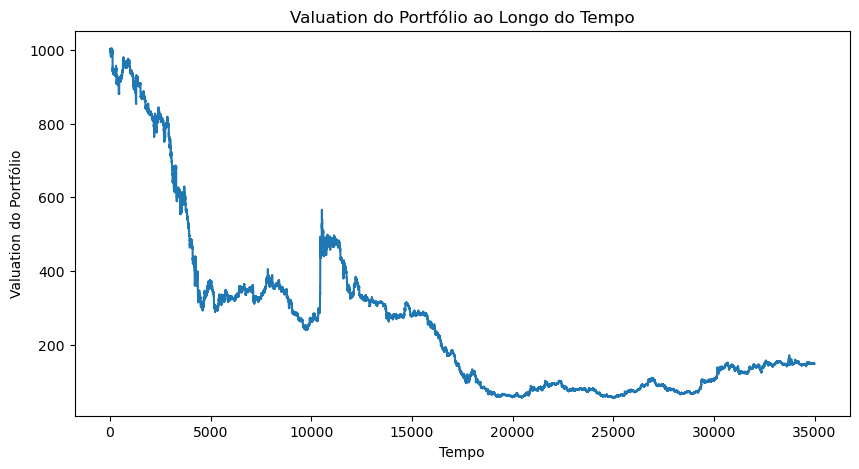

In [13]:
portfolio_values = []

env = gym.make("TradingEnv",
              name='BTCUSD',
              df=df.iloc[:, :],
              positions=[-1, 0, 1],
              trading_fees=0.01/100,
              borrow_interest_rate=0.0003/100,
              windows=5)

done, truncated = False, False
observation, info = env.reset()
while not done and not truncated:
    action, _states = model.predict(observation)
    observation, reward, done, truncated, info = env.step(action)
    portfolio_values.append(info['portfolio_valuation'])  # Adicione o valor do portfólio à lista
    if done or truncated:
        break

## data visualization
plt.figure(figsize=(10,5))
plt.plot(portfolio_values)
plt.title('Valuation do Portfólio ao Longo do Tempo')
plt.xlabel('Tempo')
plt.ylabel('Valuation do Portfólio')
plt.show()

# env.env.unwrapped.save_for_render(dir = "render_logs")

array([[ 0.       ,  0.       ],
       [-1.       , -1.0026231],
       [-1.       , -1.0010792],
       [-1.       , -1.0037246],
       [-1.       , -1.0033262]], dtype=float32)